#  Análisis comparativo Pre-test y Post-test del impacto de una aplicación móvil en la formación docente inclusiva

**Elaborado por:** Holger Gonzalez Bravo

## Descripción del análisis

En el presente notebook se desarrolla un **análisis cuantitativo** de los resultados obtenidos a partir de la aplicación de instrumentos **Pre-test** y **Post-test** dirigidos a docentes universitarios de la carrera de Computación.

El propósito de este análisis es **evaluar el efecto del uso de una aplicación móvil de formación docente** en el fortalecimiento del **conocimiento**, el **uso de Tecnologías de la Información y la Comunicación (TIC) inclusivas**, las **actitudes inclusivas**, la **práctica docente** y la **valoración de la aplicación móvil**, en relación con la atención educativa de estudiantes con **discapacidad sensorial**.

El análisis se enmarca en el objetivo general de la investigación, el cual busca determinar si la intervención mediante la aplicación móvil genera **cambios significativos** entre las mediciones iniciales y finales, evidenciando su efectividad como recurso de **formación docente continua orientada a la inclusión educativa**.



## Metodología de análisis

Para el desarrollo del análisis se realiza una **comparación sistemática** de los resultados obtenidos antes y después de la intervención, considerando las dimensiones establecidas en el instrumento de evaluación. El procedimiento incluye:

- La **representación gráfica de frecuencias** por alternativa de respuesta para cada pregunta del instrumento.
- La **comparación visual Pre-test vs Post-test** mediante gráficos tipo espejo, que permiten identificar de forma clara los cambios producidos tras el uso de la aplicación móvil.
- El análisis comparativo por **pregunta** y por **dimensión**, permitiendo observar tendencias generales y específicas en el comportamiento de las respuestas.

Este enfoque de análisis permite obtener una visión clara y estructurada del impacto de la aplicación móvil en la formación docente, proporcionando evidencia empírica que sustenta los resultados y conclusiones del estudio.


# Librerias a Usar

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Análisis unitario de cada pregunta (Pre-test)

En esta sección se presenta el **análisis descriptivo individual de cada pregunta del instrumento Pre-test**, con el objetivo de identificar el **nivel inicial de conocimiento, actitudes y prácticas docentes** relacionadas con el uso de las TIC inclusivas y la atención educativa a estudiantes con discapacidad sensorial.

El análisis se realiza mediante la **representación gráfica de las frecuencias de respuesta por alternativa**, lo que permite establecer una **línea base** sobre la situación inicial de los docentes antes de la intervención, sirviendo como punto de referencia para la posterior comparación con los resultados obtenidos en el Post-test.


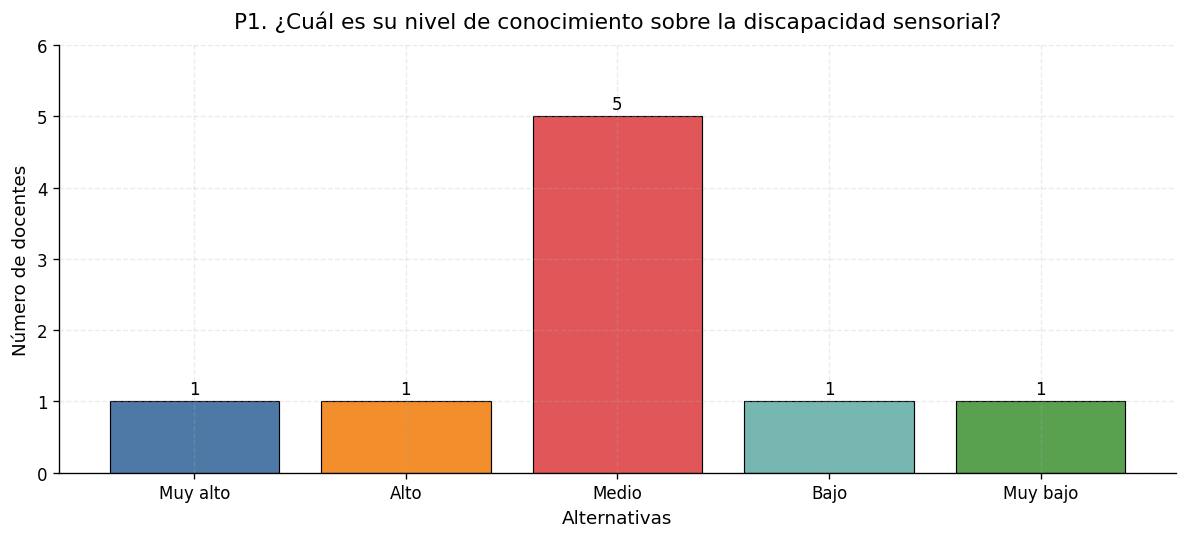

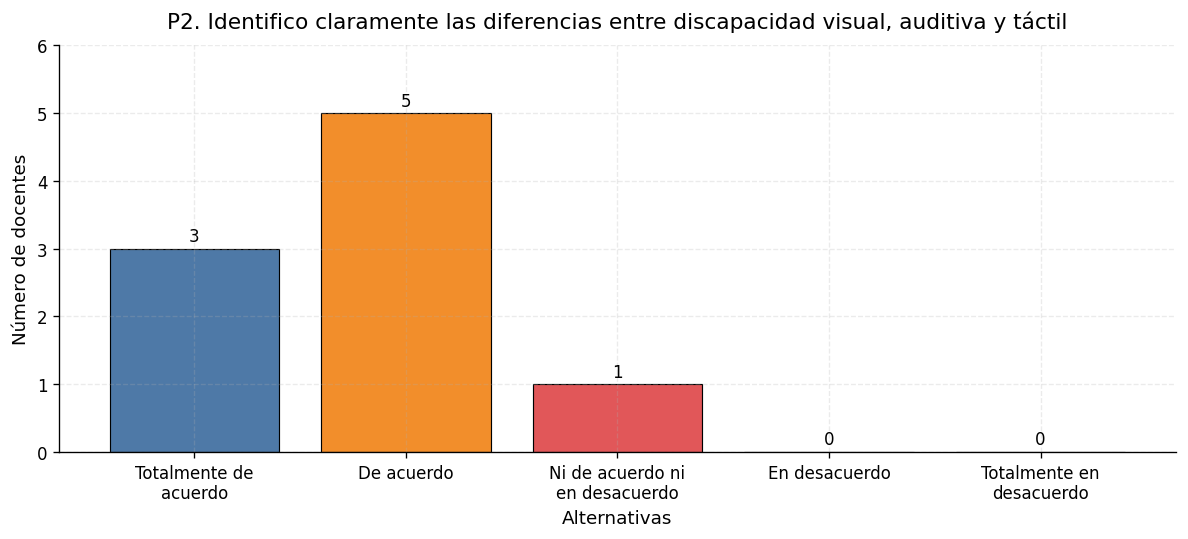

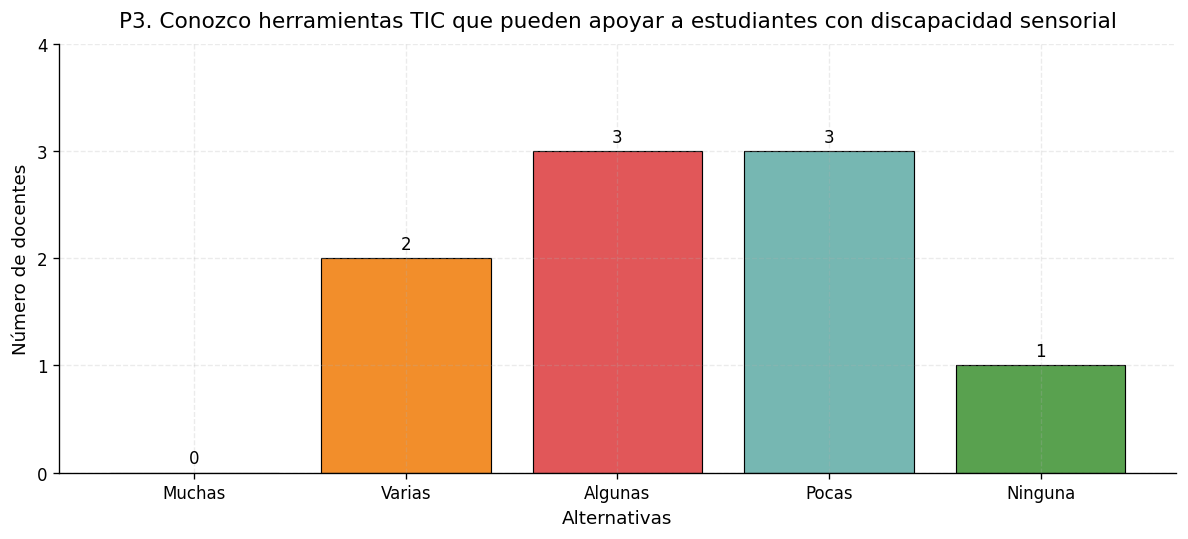

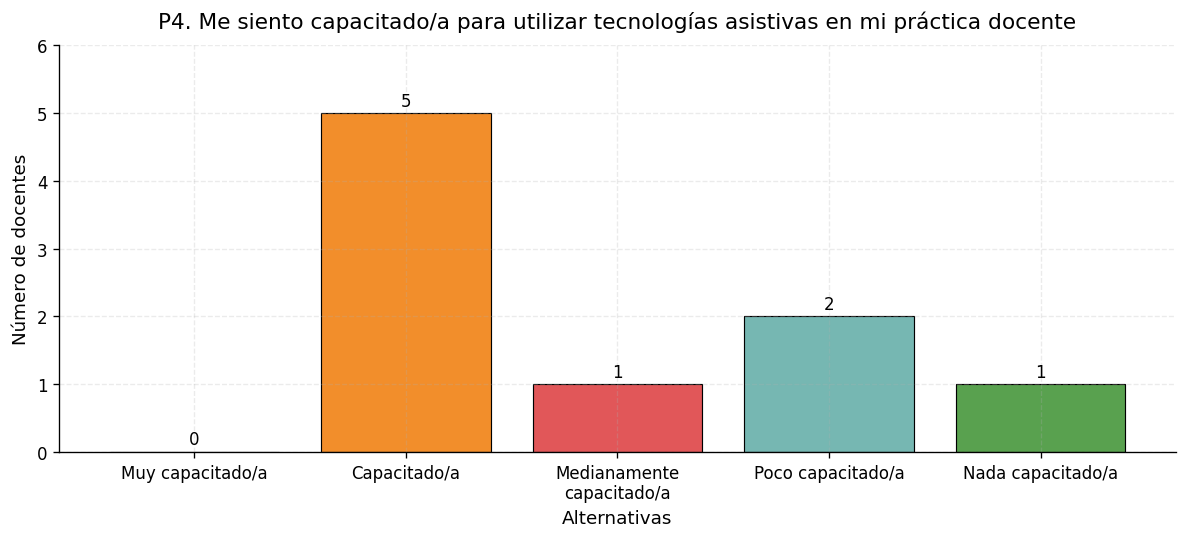

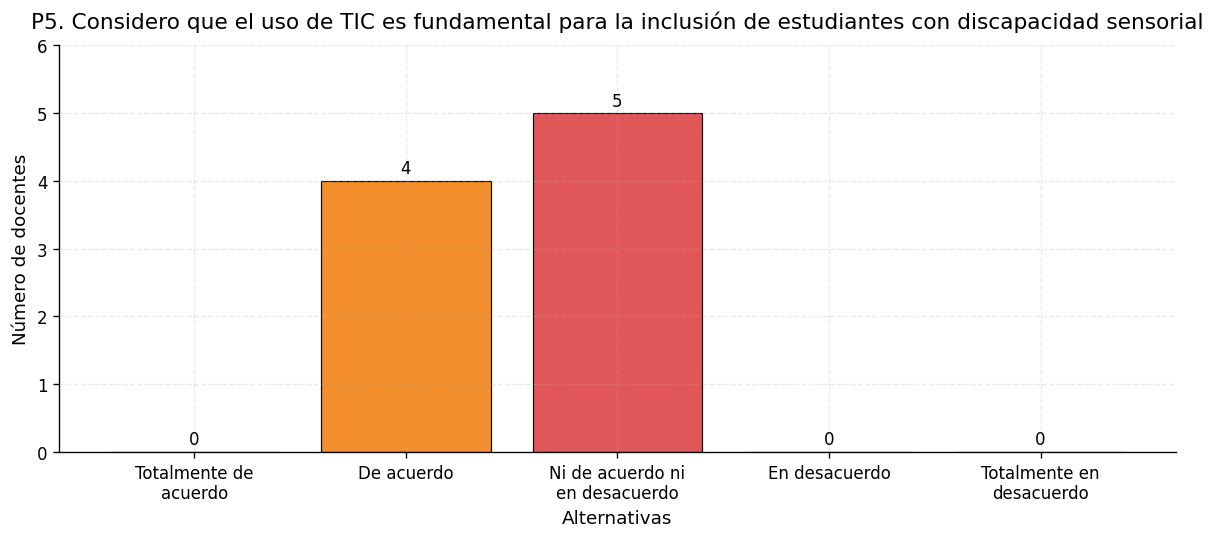

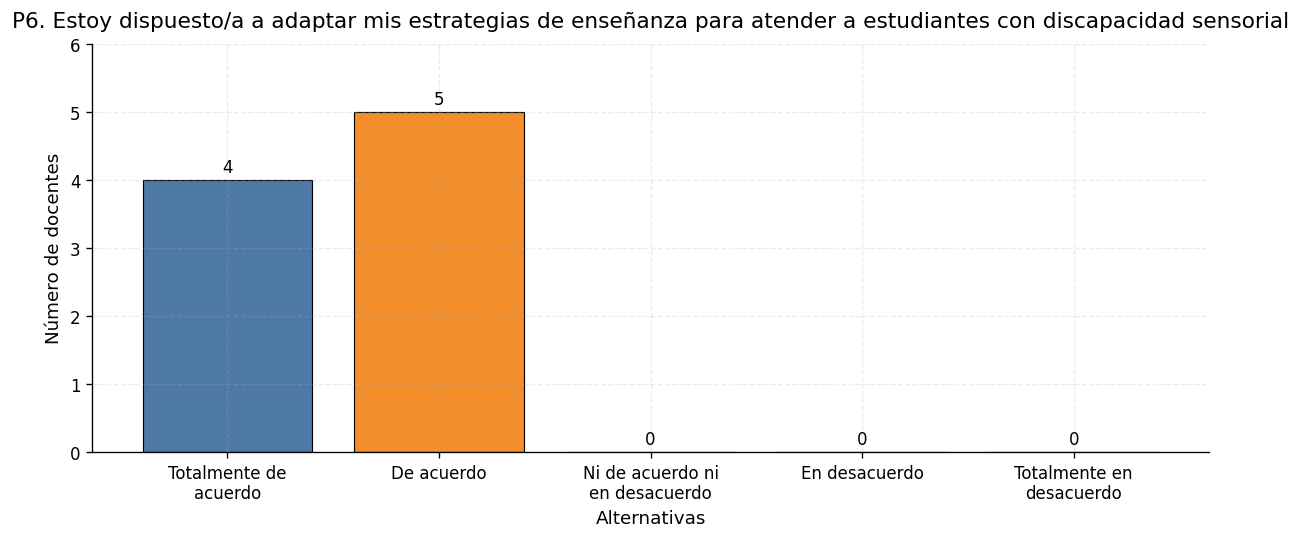

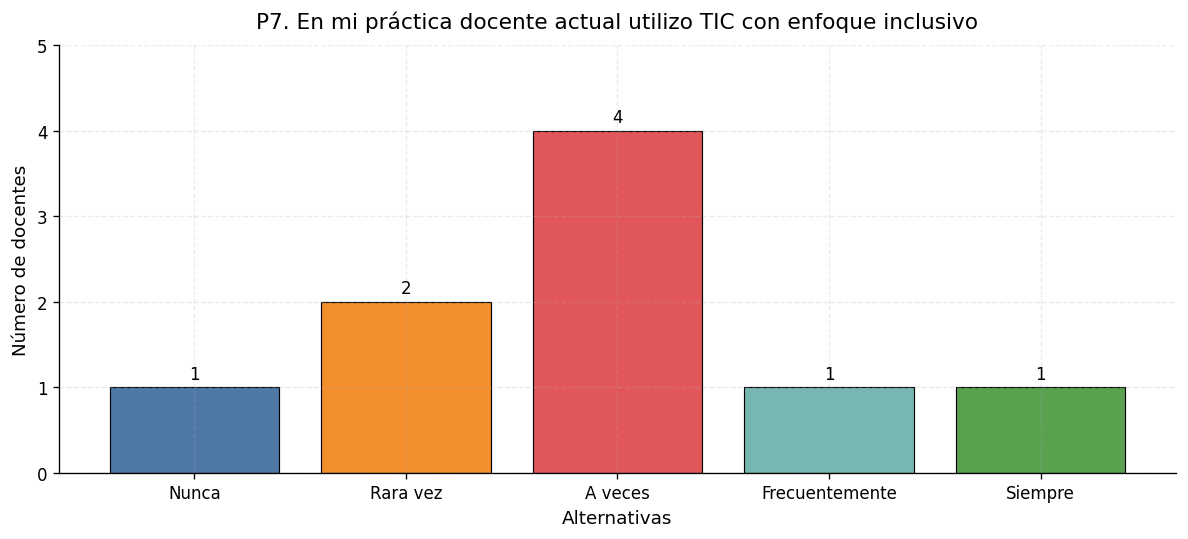

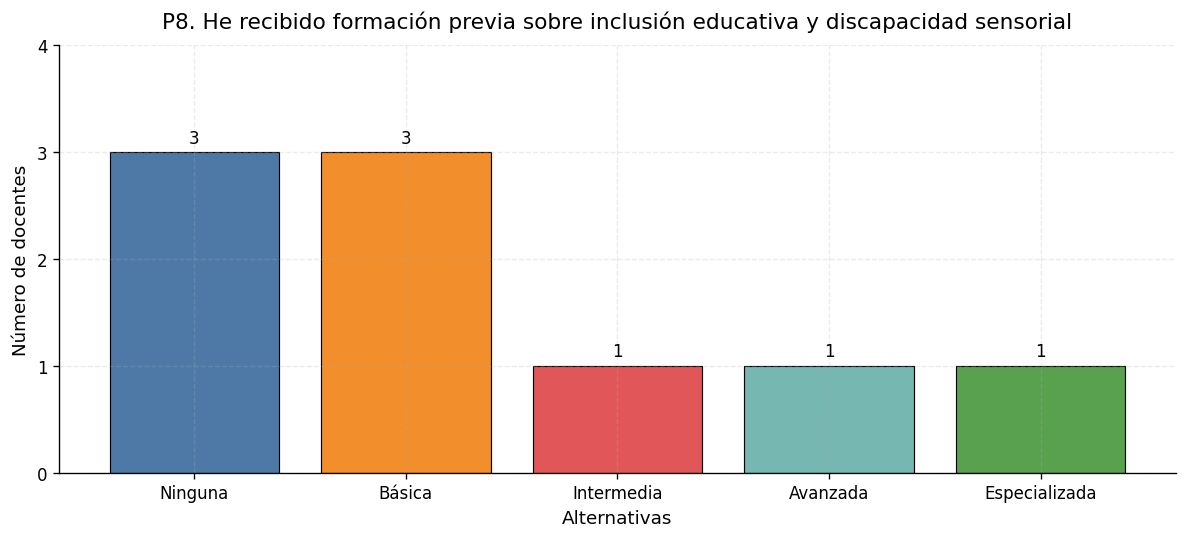

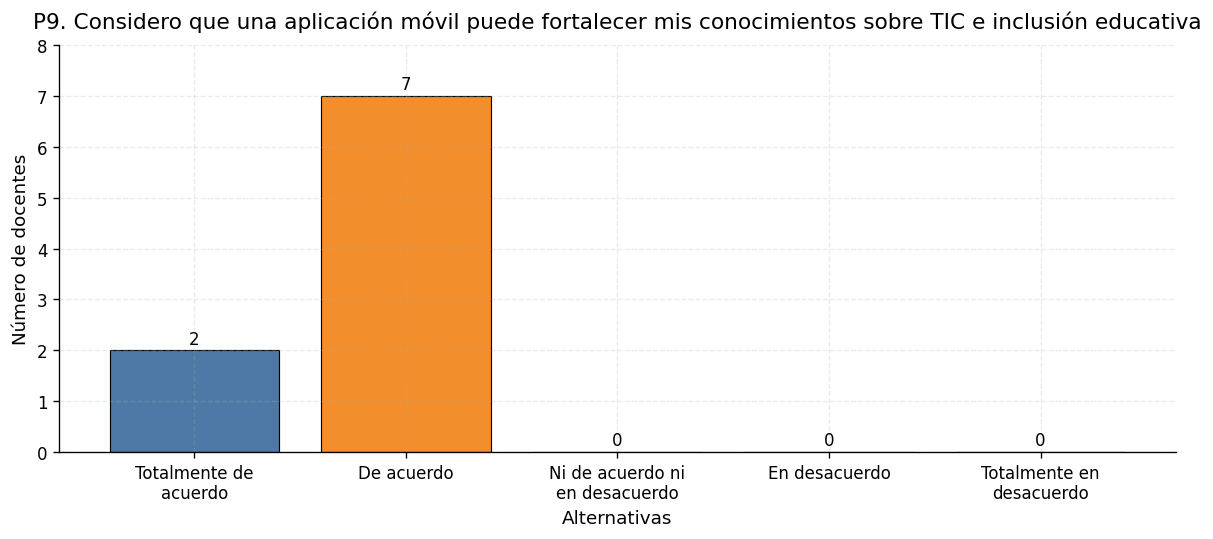

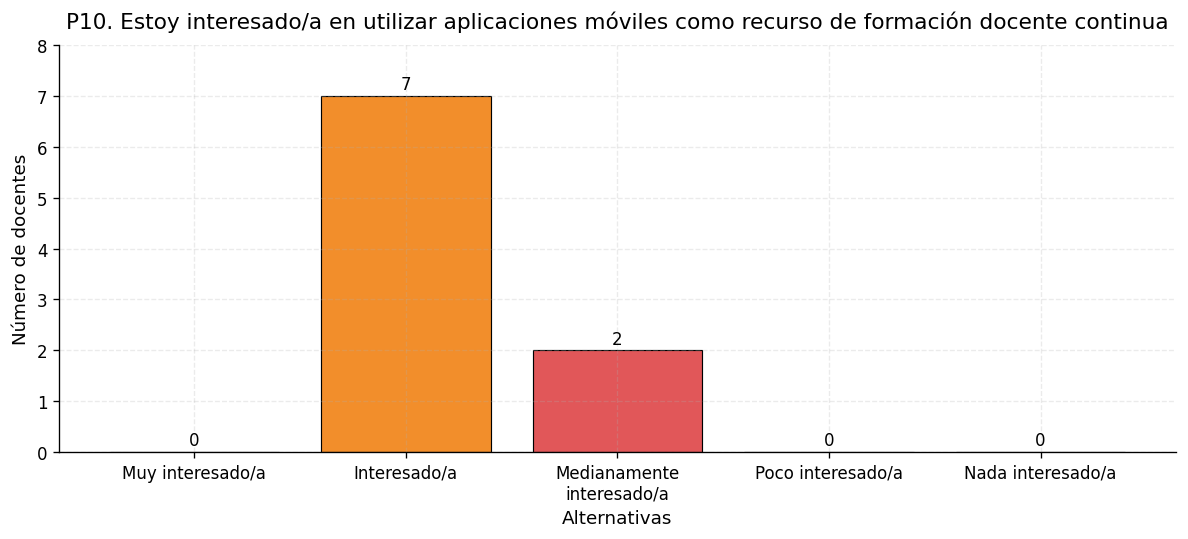

In [2]:
plt.rcParams.update({
    "figure.dpi": 120,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
})

COLORES_5 = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]

# =========================================================
# FUNCIONES
# =========================================================
def promedio_ponderado(conteos, codigos):
    total = sum(conteos)
    if total == 0:
        return 0
    return sum(c * w for c, w in zip(conteos, codigos)) / total


def wrap_text(txt, max_len=18):
    """Corta textos largos en varias líneas para que se vean bien en el eje X."""
    palabras = txt.split()
    lineas, linea = [], ""
    for w in palabras:
        if len(linea) + len(w) + (1 if linea else 0) <= max_len:
            linea = (linea + " " + w).strip()
        else:
            lineas.append(linea)
            linea = w
    if linea:
        lineas.append(linea)
    return "\n".join(lineas)


def grafica_pregunta_vistosa(titulo, opciones, conteos):
    """
    Gráfica bonita:
    - Eje Y con enteros (sin 0.5)
    - Barras con borde
    - Valores encima de cada barra
    - Etiquetas X con salto de línea si son largas
    - Colores por barra
    """
    opciones_wrapped = [wrap_text(x) for x in opciones]

    fig, ax = plt.subplots(figsize=(10, 4.6))

    colores = (COLORES_5 * ((len(conteos) // len(COLORES_5)) + 1))[:len(conteos)]
    bars = ax.bar(opciones_wrapped, conteos, color=colores, edgecolor="black", linewidth=0.7)

    ax.set_title(titulo, pad=10)
    ax.set_xlabel("Alternativas")
    ax.set_ylabel("Número de docentes")

    ymax = max(conteos) if conteos else 0
    ax.set_ylim(0, ymax + max(1, int(ymax * 0.25)))

    for b in bars:
        v = b.get_height()
        ax.text(
            b.get_x() + b.get_width() / 2,
            v + 0.05,
            f"{int(v)}",
            ha="center",
            va="bottom",
            fontsize=10
        )

    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()


# =========================================================
# DATOS PRE-TEST
# =========================================================
pre_test = {
    # DIMENSIÓN 1
    "P1. ¿Cuál es su nivel de conocimiento sobre la discapacidad sensorial?": {
        "dimension": "D1",
        "opciones": ["Muy alto", "Alto", "Medio", "Bajo", "Muy bajo"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [1, 1, 5, 1, 1],
    },
    "P2. Identifico claramente las diferencias entre discapacidad visual, auditiva y táctil": {
        "dimension": "D1",
        "opciones": ["Totalmente de acuerdo", "De acuerdo",
                     "Ni de acuerdo ni en desacuerdo",
                     "En desacuerdo", "Totalmente en desacuerdo"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [3, 5, 1, 0, 0],
    },

    # DIMENSIÓN 2
    "P3. Conozco herramientas TIC que pueden apoyar a estudiantes con discapacidad sensorial": {
        "dimension": "D2",
        "opciones": ["Muchas", "Varias", "Algunas", "Pocas", "Ninguna"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [0, 2, 3, 3, 1],
    },
    "P4. Me siento capacitado/a para utilizar tecnologías asistivas en mi práctica docente": {
        "dimension": "D2",
        "opciones": ["Muy capacitado/a", "Capacitado/a",
                     "Medianamente capacitado/a",
                     "Poco capacitado/a", "Nada capacitado/a"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [0, 5, 1, 2, 1],
    },

    # DIMENSIÓN 3
    "P5. Considero que el uso de TIC es fundamental para la inclusión de estudiantes con discapacidad sensorial": {
        "dimension": "D3",
        "opciones": ["Totalmente de acuerdo", "De acuerdo",
                     "Ni de acuerdo ni en desacuerdo",
                     "En desacuerdo", "Totalmente en desacuerdo"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [0, 4, 5, 0, 0],
    },
    "P6. Estoy dispuesto/a a adaptar mis estrategias de enseñanza para atender a estudiantes con discapacidad sensorial": {
        "dimension": "D3",
        "opciones": ["Totalmente de acuerdo", "De acuerdo",
                     "Ni de acuerdo ni en desacuerdo",
                     "En desacuerdo", "Totalmente en desacuerdo"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [4, 5, 0, 0, 0],
    },

    # DIMENSIÓN 4
    "P7. En mi práctica docente actual utilizo TIC con enfoque inclusivo": {
        "dimension": "D4",
        "opciones": ["Nunca", "Rara vez", "A veces", "Frecuentemente", "Siempre"],
        "codigos":  [1, 2, 3, 4, 5],  # Nunca=1 ... Siempre=5
        "conteos":  [1, 2, 4, 1, 1],
    },
    "P8. He recibido formación previa sobre inclusión educativa y discapacidad sensorial": {
        "dimension": "D4",
        "opciones": ["Ninguna", "Básica", "Intermedia", "Avanzada", "Especializada"],
        "codigos":  [1, 2, 3, 4, 5],  # Ninguna=1 ... Especializada=5
        "conteos":  [3, 3, 1, 1, 1],
    },

    # DIMENSIÓN 5
    "P9. Considero que una aplicación móvil puede fortalecer mis conocimientos sobre TIC e inclusión educativa": {
        "dimension": "D5",
        "opciones": ["Totalmente de acuerdo", "De acuerdo",
                     "Ni de acuerdo ni en desacuerdo",
                     "En desacuerdo", "Totalmente en desacuerdo"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [2, 7, 0, 0, 0],
    },
    "P10. Estoy interesado/a en utilizar aplicaciones móviles como recurso de formación docente continua": {
        "dimension": "D5",
        "opciones": ["Muy interesado/a", "Interesado/a", "Medianamente interesado/a", "Poco interesado/a", "Nada interesado/a"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [0, 7, 2, 0, 0],
    },
}

# =========================================================
# 1) GRÁFICAS POR PREGUNTA (PRE-TEST)
# =========================================================
for titulo, info in pre_test.items():
    grafica_pregunta_vistosa(
        titulo=titulo,
        opciones=info["opciones"],
        conteos=info["conteos"]
    )


# Análisis unitario de cada pregunta (Post-test)

En esta sección se presenta el **análisis descriptivo individual de cada pregunta del instrumento Post-test**, con el propósito de evaluar los **cambios producidos tras la intervención** mediante el uso de la aplicación móvil de formación docente.

El análisis se basa en la **representación gráfica de las frecuencias de respuesta por alternativa**, lo que permite identificar el **nivel de conocimiento alcanzado**, las **actitudes inclusivas desarrolladas**, las **prácticas docentes fortalecidas** y la **percepción de los docentes respecto a la utilidad de la aplicación móvil**, posterior a su utilización.

Los resultados obtenidos en esta etapa constituyen la base para la **comparación con los datos del Pre-test**, permitiendo determinar el impacto de la intervención y su efectividad como recurso de apoyo para la formación docente continua orientada a la inclusión educativa y al uso de TIC para la atención de la discapacidad sensorial.


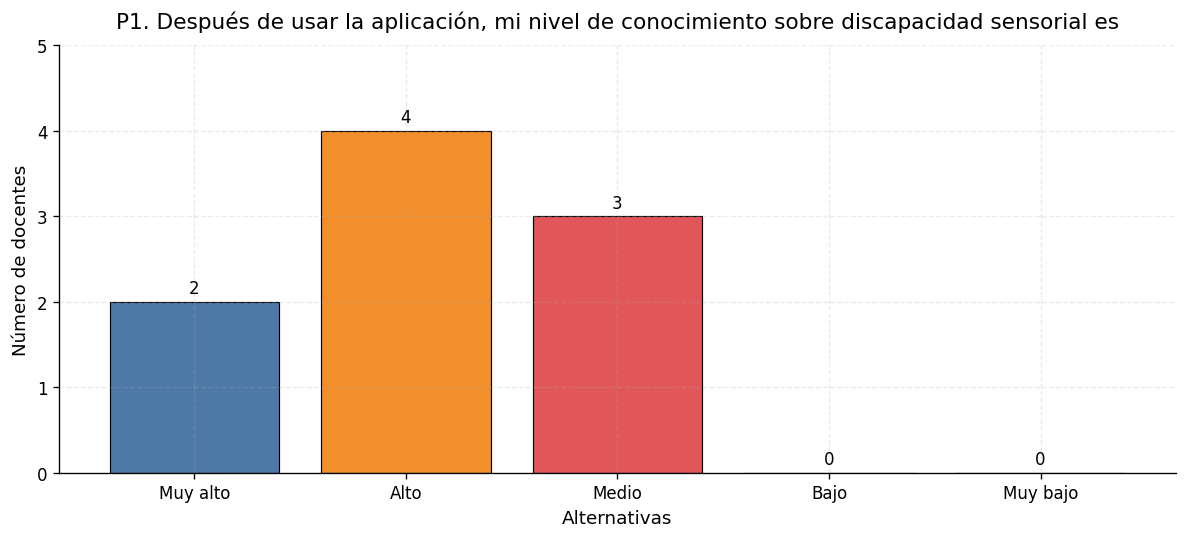

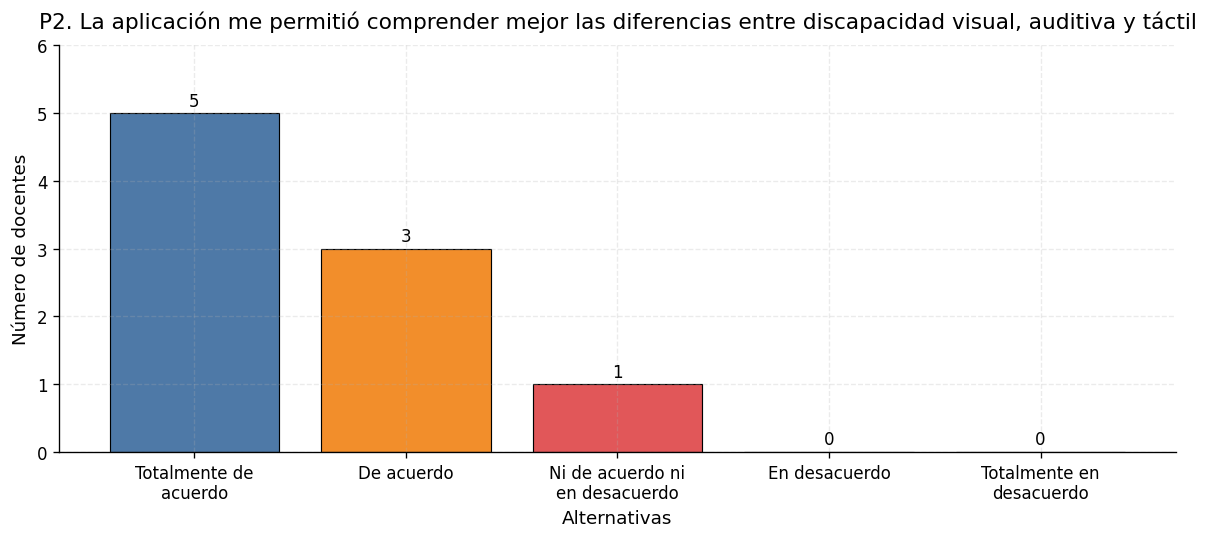

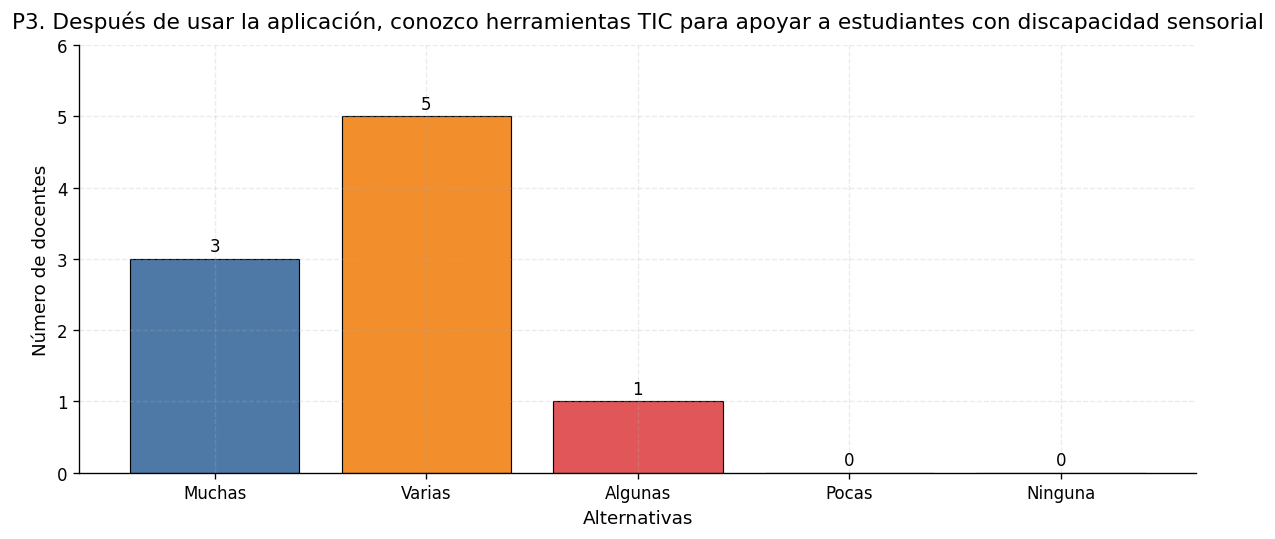

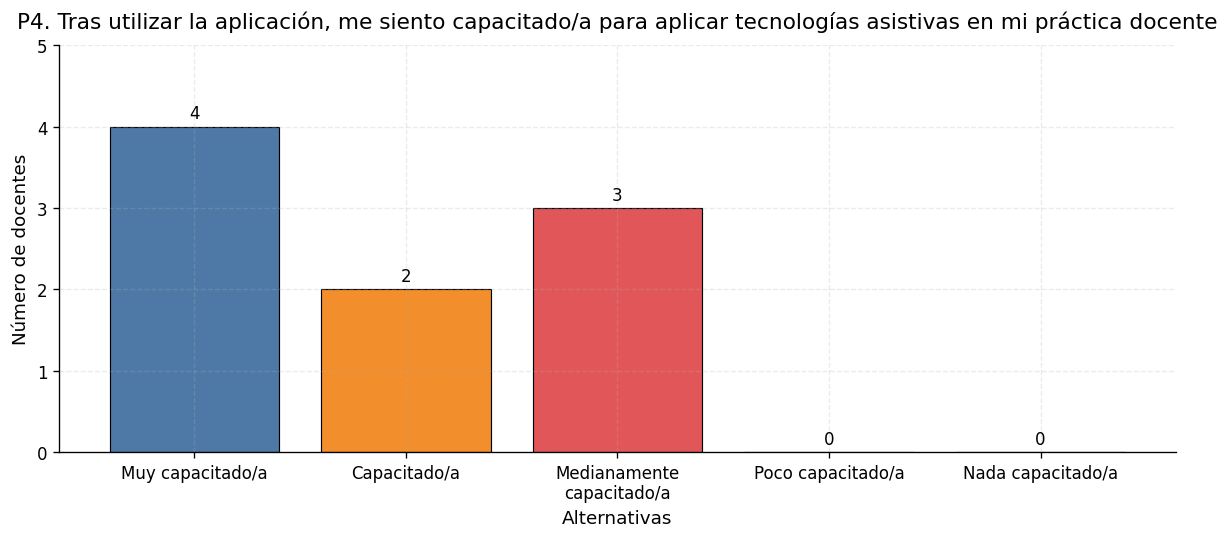

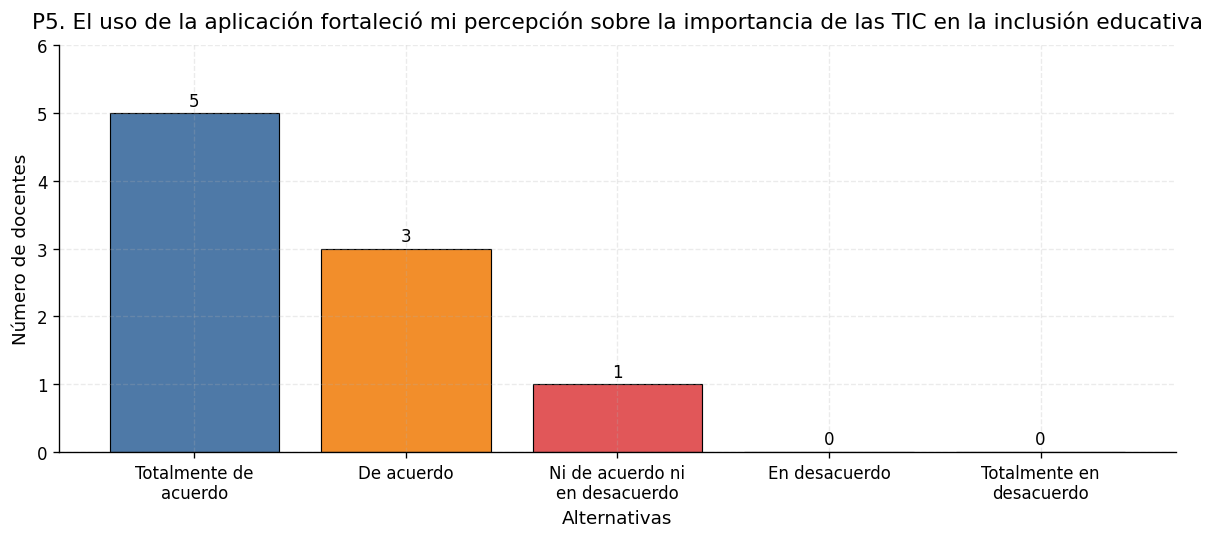

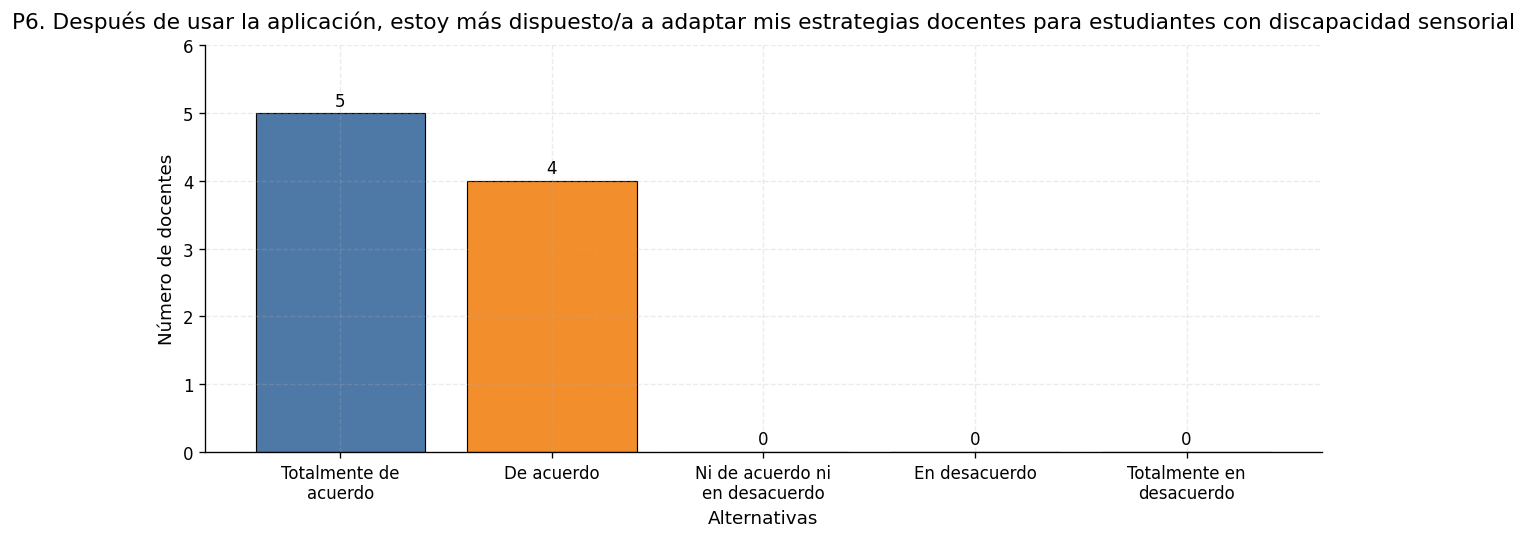

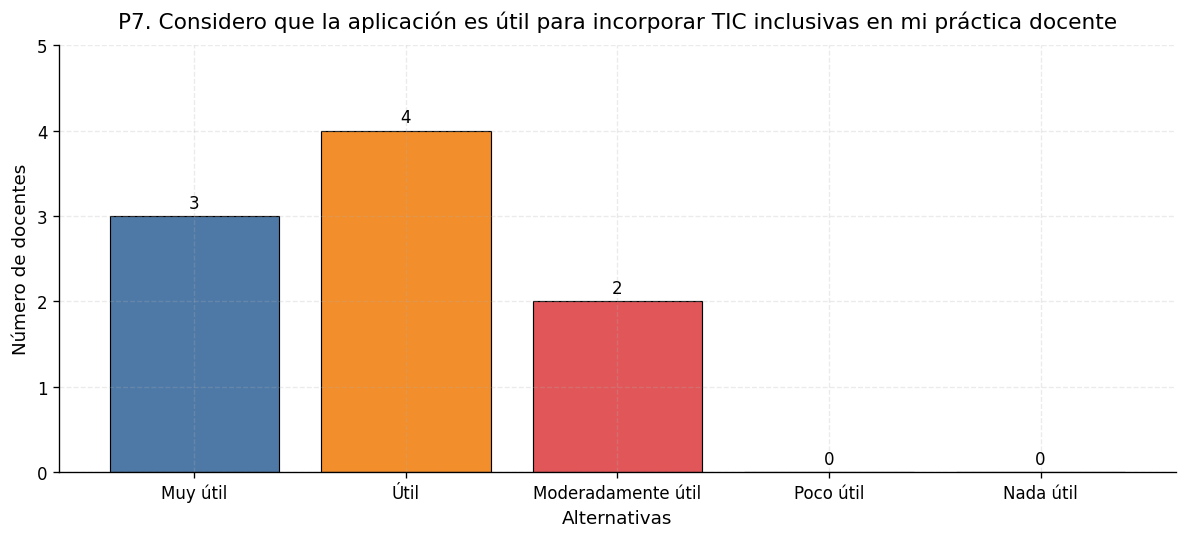

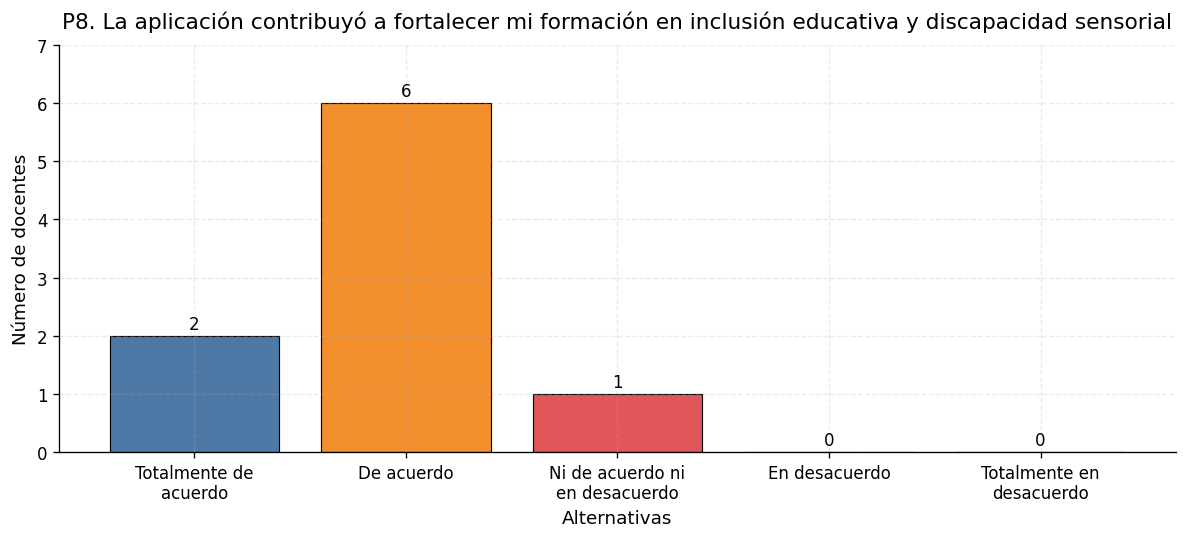

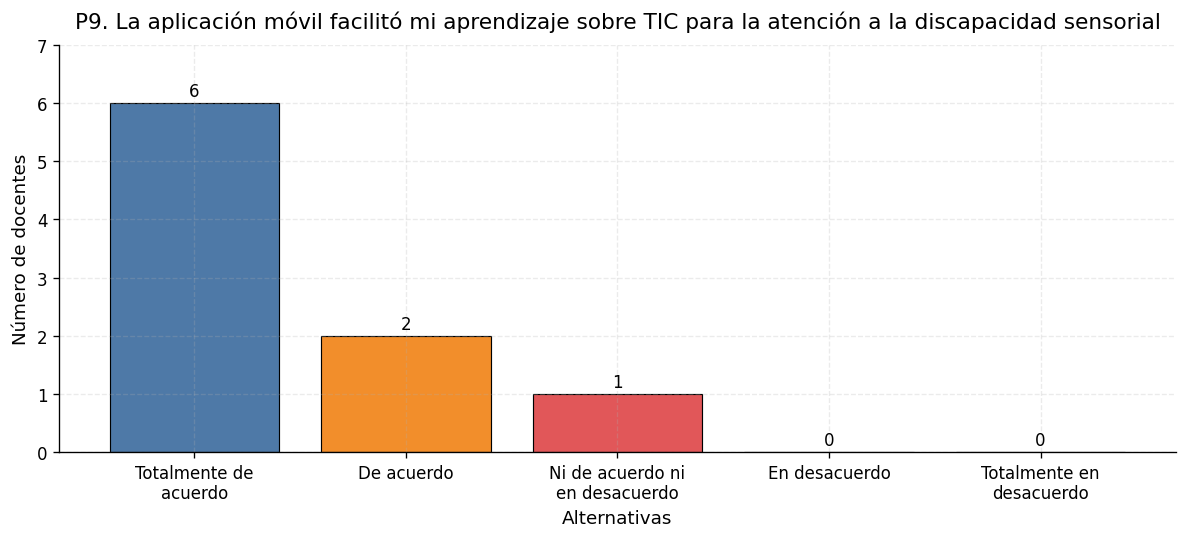

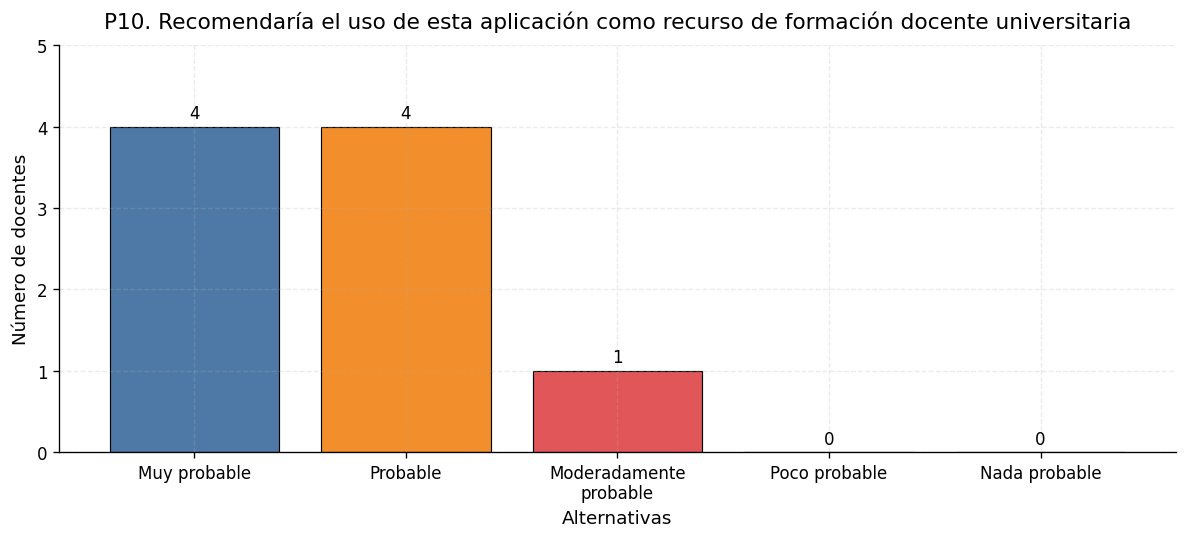

In [3]:
plt.rcParams.update({
    "figure.dpi": 120,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
})

# =========================================================
# PALETA
# =========================================================
COLORES_5 = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]

# =========================================================
# FUNCIONES
# =========================================================
def promedio_ponderado(conteos, codigos):
    total = sum(conteos)
    if total == 0:
        return 0
    return sum(c * w for c, w in zip(conteos, codigos)) / total


def wrap_text(txt, max_len=18):
    """Corta textos largos en varias líneas para que se vean bien en el eje X."""
    palabras = txt.split()
    lineas, linea = [], ""
    for w in palabras:
        if len(linea) + len(w) + (1 if linea else 0) <= max_len:
            linea = (linea + " " + w).strip()
        else:
            lineas.append(linea)
            linea = w
    if linea:
        lineas.append(linea)
    return "\n".join(lineas)


def grafica_pregunta_vistosa(titulo, opciones, conteos):
    """
    Gráfica bonita:
    - Eje Y con enteros (sin 0.5)
    - Barras con borde
    - Valores encima de cada barra
    - Etiquetas X con salto de línea si son largas
    - Colores por barra (5 alternativas)
    """
    opciones_wrapped = [wrap_text(x) for x in opciones]

    fig, ax = plt.subplots(figsize=(10, 4.6))

    colores = (COLORES_5 * ((len(conteos) // len(COLORES_5)) + 1))[:len(conteos)]
    bars = ax.bar(opciones_wrapped, conteos, color=colores, edgecolor="black", linewidth=0.7)

    ax.set_title(titulo, pad=10)
    ax.set_xlabel("Alternativas")
    ax.set_ylabel("Número de docentes")

    # Etiquetas de valor encima de las barras
    ymax = max(conteos) if conteos else 0
    ax.set_ylim(0, ymax + max(1, int(ymax * 0.25)))

    for b in bars:
        v = b.get_height()
        ax.text(
            b.get_x() + b.get_width() / 2,
            v + 0.05,
            f"{int(v)}",
            ha="center",
            va="bottom",
            fontsize=10
        )

    #  Eje Y solo con enteros
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Limpieza visual
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()


# =========================================================
# DATOS POST-TEST
# =========================================================
post_test = {
    # DIMENSIÓN 1
    "P1. Después de usar la aplicación, mi nivel de conocimiento sobre discapacidad sensorial es": {
        "dimension": "D1",
        "opciones": ["Muy alto", "Alto", "Medio", "Bajo", "Muy bajo"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [2, 4, 3, 0, 0],
    },
    "P2. La aplicación me permitió comprender mejor las diferencias entre discapacidad visual, auditiva y táctil": {
        "dimension": "D1",
        "opciones": ["Totalmente de acuerdo", "De acuerdo",
                     "Ni de acuerdo ni en desacuerdo",
                     "En desacuerdo", "Totalmente en desacuerdo"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [5, 3, 1, 0, 0],
    },

    # DIMENSIÓN 2
    "P3. Después de usar la aplicación, conozco herramientas TIC para apoyar a estudiantes con discapacidad sensorial": {
        "dimension": "D2",
        "opciones": ["Muchas", "Varias", "Algunas", "Pocas", "Ninguna"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [3, 5, 1, 0, 0],
    },
    "P4. Tras utilizar la aplicación, me siento capacitado/a para aplicar tecnologías asistivas en mi práctica docente": {
        "dimension": "D2",
        "opciones": ["Muy capacitado/a", "Capacitado/a",
                     "Medianamente capacitado/a",
                     "Poco capacitado/a", "Nada capacitado/a"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [4, 2, 3, 0, 0],
    },

    # DIMENSIÓN 3
    "P5. El uso de la aplicación fortaleció mi percepción sobre la importancia de las TIC en la inclusión educativa": {
        "dimension": "D3",
        "opciones": ["Totalmente de acuerdo", "De acuerdo",
                     "Ni de acuerdo ni en desacuerdo",
                     "En desacuerdo", "Totalmente en desacuerdo"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [5, 3, 1, 0, 0],
    },
    "P6. Después de usar la aplicación, estoy más dispuesto/a a adaptar mis estrategias docentes para estudiantes con discapacidad sensorial": {
        "dimension": "D3",
        "opciones": ["Totalmente de acuerdo", "De acuerdo",
                     "Ni de acuerdo ni en desacuerdo",
                     "En desacuerdo", "Totalmente en desacuerdo"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [5, 4, 0, 0, 0],
    },

    # DIMENSIÓN 4
    "P7. Considero que la aplicación es útil para incorporar TIC inclusivas en mi práctica docente": {
        "dimension": "D4",
        "opciones": ["Muy útil", "Útil",
                     "Moderadamente útil",
                     "Poco útil", "Nada útil"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [3, 4, 2, 0, 0],
    },
    "P8. La aplicación contribuyó a fortalecer mi formación en inclusión educativa y discapacidad sensorial": {
        "dimension": "D4",
        "opciones": ["Totalmente de acuerdo", "De acuerdo",
                     "Ni de acuerdo ni en desacuerdo",
                     "En desacuerdo", "Totalmente en desacuerdo"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [2, 6, 1, 0, 0],
    },

    # DIMENSIÓN 5
    "P9. La aplicación móvil facilitó mi aprendizaje sobre TIC para la atención a la discapacidad sensorial": {
        "dimension": "D5",
        "opciones": ["Totalmente de acuerdo", "De acuerdo",
                     "Ni de acuerdo ni en desacuerdo",
                     "En desacuerdo", "Totalmente en desacuerdo"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [6, 2, 1, 0, 0],
    },
    "P10. Recomendaría el uso de esta aplicación como recurso de formación docente universitaria": {
        "dimension": "D5",
        "opciones": ["Muy probable", "Probable",
                     "Moderadamente probable",
                     "Poco probable", "Nada probable"],
        "codigos":  [5, 4, 3, 2, 1],
        "conteos":  [4, 4, 1, 0, 0],
    },
}

# =========================================================
# 1) GRÁFICAS POR PREGUNTA (POST-TEST)
# =========================================================
for titulo, info in post_test.items():
    grafica_pregunta_vistosa(
        titulo=titulo,
        opciones=info["opciones"],
        conteos=info["conteos"]
    )



# **Resultados comparativos en escala Likert por dimensión y pregunta: Pre-test y Post-test**


***DIMENSIÓN 1: CONOCIMIENTO SOBRE DISCAPACIDAD SENSORIAL***

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

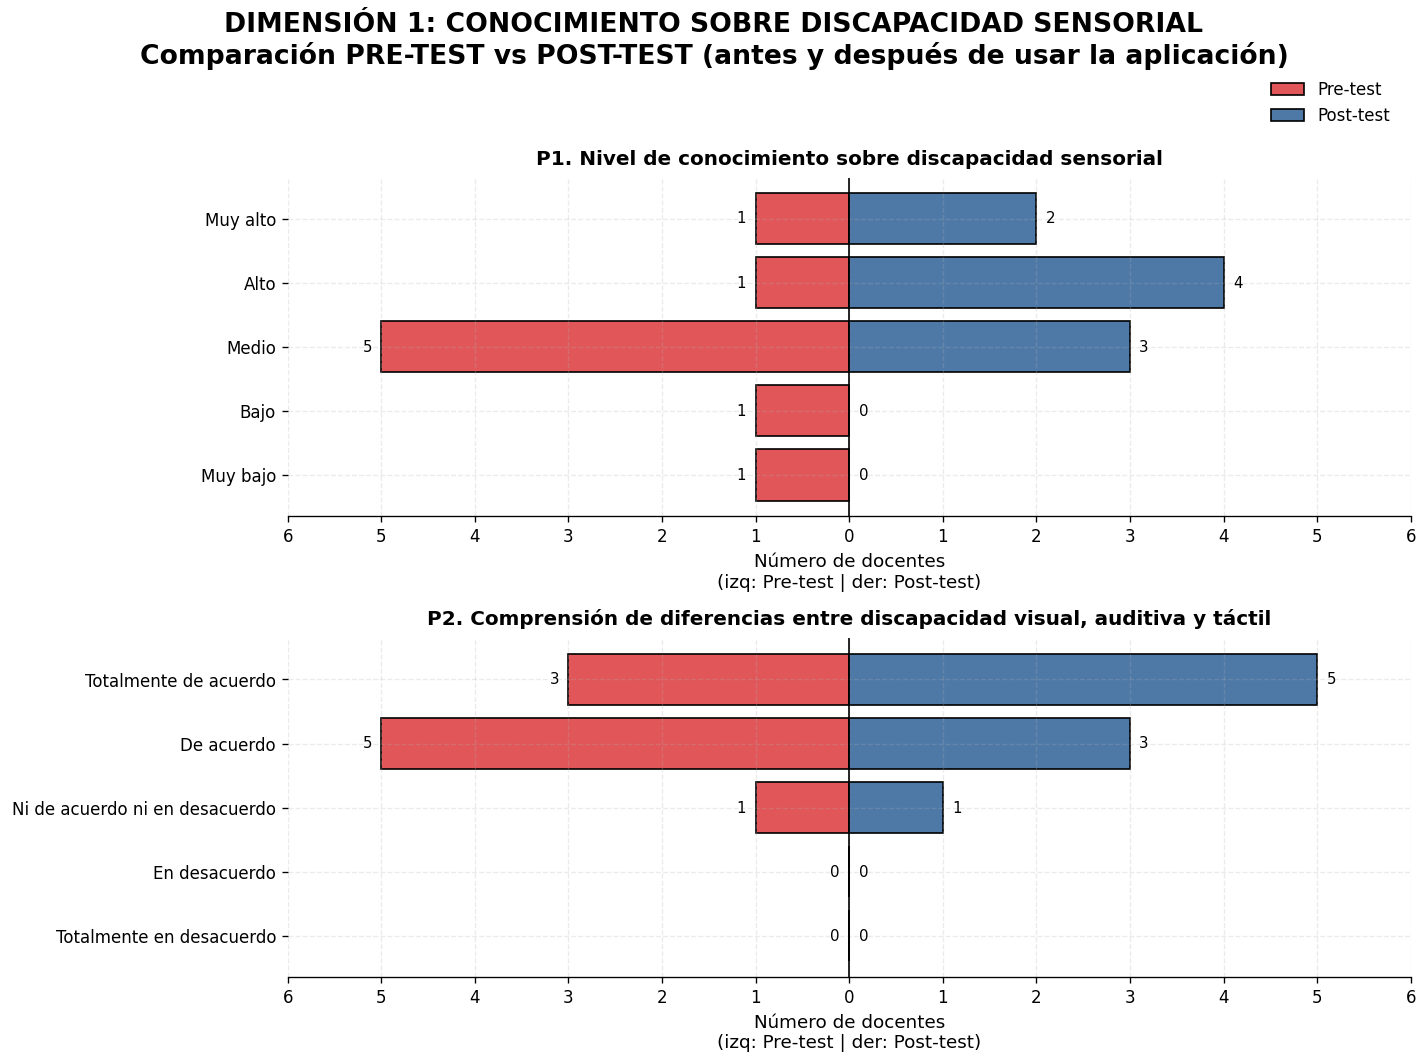

In [4]:
# =========================================================
# DIMENSIÓN 1 – CONOCIMIENTO SOBRE DISCAPACIDAD SENSORIAL
# =========================================================
p1_alternativas = ["Muy alto", "Alto", "Medio", "Bajo", "Muy bajo"]

# PRE (izquierda)
p1_pre  = np.array([1, 1, 5, 1, 1])

# POST (derecha)
p1_post = np.array([2, 4, 3, 0, 0])


# --------------------------------------
# P2 (PRE vs POST) - Likert (Pos→Neg)
# --------------------------------------
p2_alternativas = [
    "Totalmente de acuerdo",
    "De acuerdo",
    "Ni de acuerdo ni en desacuerdo",
    "En desacuerdo",
    "Totalmente en desacuerdo"
]

# PRE (izquierda)
p2_pre  = np.array([3, 5, 1, 0, 0])

# POST (derecha)
p2_post = np.array([5, 3, 1, 0, 0])


# =========================================================
# FUNCIÓN PARA GRAFICA ESPEJO
# =========================================================
def grafica_espejo(ax, alternativas, pre_values, post_values, titulo_pregunta):
    y = np.arange(len(alternativas))

    # PRE izquierda
    ax.barh(y, -pre_values, color="#E15759", edgecolor="black", label="Pre-test")

    # POST derecha
    ax.barh(y, post_values, color="#4E79A7", edgecolor="black", label="Post-test")

    # Línea central
    ax.axvline(0, color="black", linewidth=1)

    # Eje Y
    ax.set_yticks(y)
    ax.set_yticklabels(alternativas)

    # Positivo arriba
    ax.invert_yaxis()

    # Ajuste del eje X (valores absolutos)
    max_val = max(pre_values.max(), post_values.max())
    ax.set_xlim(-(max_val + 1), (max_val + 1))
    ticks = list(range(-(max_val + 1), (max_val + 2)))
    ax.set_xticks(ticks)
    ax.set_xticklabels([str(abs(t)) for t in ticks])

    # Etiquetas en barras
    for i in range(len(alternativas)):
        ax.text(-pre_values[i] - 0.1, i, str(pre_values[i]),
                va="center", ha="right", fontsize=9)
        ax.text(post_values[i] + 0.1, i, str(post_values[i]),
                va="center", ha="left", fontsize=9)

    ax.set_title(titulo_pregunta, fontsize=12, fontweight="bold", pad=8)

    # Limpieza visual
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.grid(axis="x", linestyle="--", alpha=0.25)


# =========================================================
# FIGURA PRINCIPAL (2 SUBGRÁFICAS)
# =========================================================
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

fig.suptitle(
    "DIMENSIÓN 1: CONOCIMIENTO SOBRE DISCAPACIDAD SENSORIAL\n"
    "Comparación PRE-TEST vs POST-TEST (antes y después de usar la aplicación)",
    fontsize=16,
    fontweight="bold",
    y=0.98
)

# P1
grafica_espejo(
    ax=axes[0],
    alternativas=p1_alternativas,
    pre_values=p1_pre,
    post_values=p1_post,
    titulo_pregunta="P1. Nivel de conocimiento sobre discapacidad sensorial"
)

# P2
grafica_espejo(
    ax=axes[1],
    alternativas=p2_alternativas,
    pre_values=p2_pre,
    post_values=p2_post,
    titulo_pregunta="P2. Comprensión de diferencias entre discapacidad visual, auditiva y táctil"
)

# Leyenda única (arriba)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(0.98, 0.93), frameon=False)

# Etiqueta general eje X
for ax in axes:
    ax.set_xlabel("Número de docentes\n(izq: Pre-test | der: Post-test)")

plt.tight_layout(rect=[0, 0, 1, 0.94])

# =========================================================
# GUARDAR + DESCARGAR
# =========================================================
archivo = "Dimension1_P1_P2_PreVsPost.png"
fig.savefig(archivo, dpi=300, bbox_inches="tight")  # guarda en alta calidad

try:
    from google.colab import files
    files.download(archivo)
except Exception:
    print(f"✅ Gráfica guardada como: {archivo} (descarga automática solo en Google Colab)")

plt.show()


***DIMENSIÓN 2: CONOCIMIENTO Y USO DE TIC INCLUSIVAS***

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

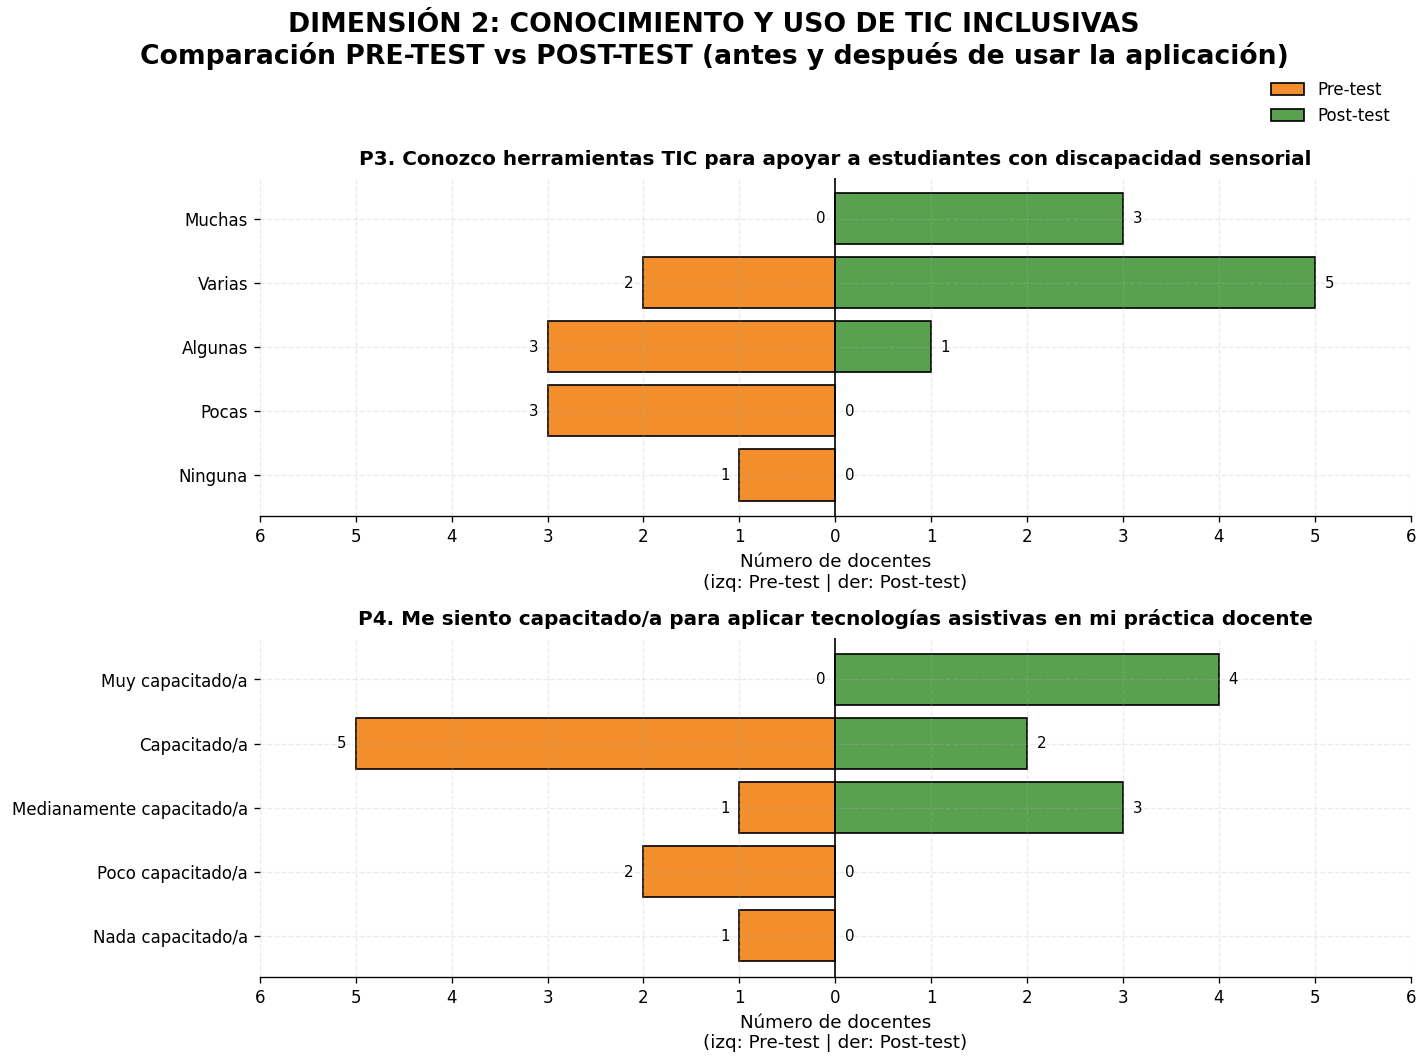

In [5]:
# =========================================================
# DIMENSIÓN 2 – CONOCIMIENTO Y USO DE TIC INCLUSIVAS
# =========================================================
p3_alternativas = ["Muchas", "Varias", "Algunas", "Pocas", "Ninguna"]

# PRE (izquierda)
p3_pre  = np.array([0, 2, 3, 3, 1])

# POST (derecha)
p3_post = np.array([3, 5, 1, 0, 0])


# --------------------------------------
# P4 (PRE vs POST) - 5 niveles
# --------------------------------------
p4_alternativas = [
    "Muy capacitado/a",
    "Capacitado/a",
    "Medianamente capacitado/a",
    "Poco capacitado/a",
    "Nada capacitado/a"
]

# PRE (izquierda)
p4_pre  = np.array([0, 5, 1, 2, 1])

# POST (derecha)
p4_post = np.array([4, 2, 3, 0, 0])


# =========================================================
# FUNCIÓN PARA GRAFICA ESPEJO
# =========================================================
def grafica_espejo(ax, alternativas, pre_values, post_values, titulo_pregunta,
                   color_pre="#F28E2B", color_post="#59A14F"):
    y = np.arange(len(alternativas))

    # PRE izquierda
    ax.barh(y, -pre_values, color=color_pre, edgecolor="black", label="Pre-test")

    # POST derecha
    ax.barh(y, post_values, color=color_post, edgecolor="black", label="Post-test")

    # Línea central
    ax.axvline(0, color="black", linewidth=1)

    # Eje Y
    ax.set_yticks(y)
    ax.set_yticklabels(alternativas)

    # Positivo arriba
    ax.invert_yaxis()

    # Ajuste del eje X (valores absolutos)
    max_val = max(pre_values.max(), post_values.max())
    ax.set_xlim(-(max_val + 1), (max_val + 1))
    ticks = list(range(-(max_val + 1), (max_val + 2)))
    ax.set_xticks(ticks)
    ax.set_xticklabels([str(abs(t)) for t in ticks])

    # Etiquetas en barras
    for i in range(len(alternativas)):
        ax.text(-pre_values[i] - 0.1, i, str(pre_values[i]),
                va="center", ha="right", fontsize=9)
        ax.text(post_values[i] + 0.1, i, str(post_values[i]),
                va="center", ha="left", fontsize=9)

    ax.set_title(titulo_pregunta, fontsize=12, pad=8, fontweight="bold")

    # Limpieza visual
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.grid(axis="x", linestyle="--", alpha=0.25)


# =========================================================
# FIGURA PRINCIPAL (2 SUBGRÁFICAS)
# =========================================================
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

fig.suptitle(
    "DIMENSIÓN 2: CONOCIMIENTO Y USO DE TIC INCLUSIVAS\n"
    "Comparación PRE-TEST vs POST-TEST (antes y después de usar la aplicación)",
    fontsize=16, fontweight="bold", y=0.98
)

# P3
grafica_espejo(
    ax=axes[0],
    alternativas=p3_alternativas,
    pre_values=p3_pre,
    post_values=p3_post,
    titulo_pregunta="P3. Conozco herramientas TIC para apoyar a estudiantes con discapacidad sensorial",
    color_pre="#F28E2B",
    color_post="#59A14F"
)

# P4
grafica_espejo(
    ax=axes[1],
    alternativas=p4_alternativas,
    pre_values=p4_pre,
    post_values=p4_post,
    titulo_pregunta="P4. Me siento capacitado/a para aplicar tecnologías asistivas en mi práctica docente",
    color_pre="#F28E2B",
    color_post="#59A14F"
)

# Leyenda única
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(0.98, 0.93), frameon=False)

# Etiqueta general eje X
for ax in axes:
    ax.set_xlabel("Número de docentes\n(izq: Pre-test | der: Post-test)")

plt.tight_layout(rect=[0, 0, 1, 0.94])

# =========================================================
#GUARDAR + DESCARGAR
# =========================================================
archivo = "Dimension2_P3_P4_PreVsPost.png"
fig.savefig(archivo, dpi=300, bbox_inches="tight")

try:
    from google.colab import files
    files.download(archivo)
except Exception:
    print(f"Gráfica guardada como: {archivo} (descarga automática solo en Google Colab)")

plt.show()


***DIMENSIÓN 3: ACTITUDES INCLUSIVAS***

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

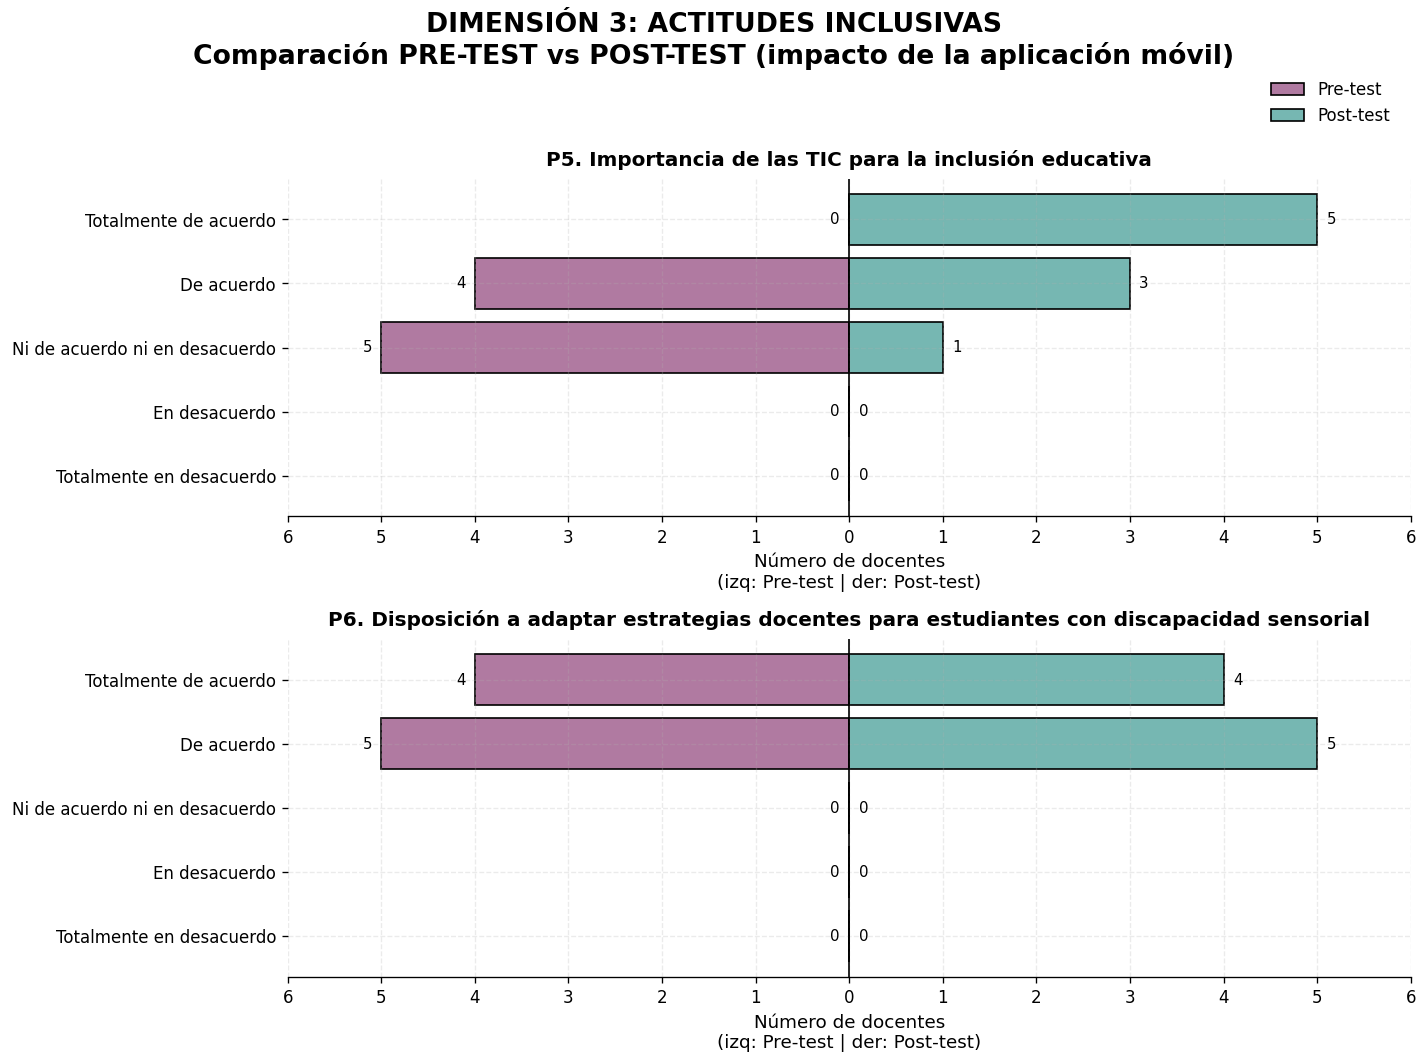

In [6]:
# =========================================================
# DIMENSIÓN 3 – ACTITUDES INCLUSIVAS
# =========================================================

p5_alternativas = [
    "Totalmente de acuerdo",
    "De acuerdo",
    "Ni de acuerdo ni en desacuerdo",
    "En desacuerdo",
    "Totalmente en desacuerdo"
]

# PRE (izquierda)
p5_pre  = np.array([0, 4, 5, 0, 0])

# POST (derecha)
p5_post = np.array([5, 3, 1, 0, 0])


# --------------------------------------
# P6 (PRE vs POST)
# --------------------------------------
p6_alternativas = [
    "Totalmente de acuerdo",
    "De acuerdo",
    "Ni de acuerdo ni en desacuerdo",
    "En desacuerdo",
    "Totalmente en desacuerdo"
]

# PRE (izquierda)
p6_pre  = np.array([4, 5, 0, 0, 0])

# POST (derecha)
p6_post = np.array([4, 5, 0, 0, 0])


# =========================================================
# FUNCIÓN PARA GRAFICA ESPEJO (reutilizable)
# =========================================================
def grafica_espejo(ax, alternativas, pre_values, post_values, titulo_pregunta,
                   color_pre, color_post):
    y = np.arange(len(alternativas))

    # PRE izquierda
    ax.barh(y, -pre_values, color=color_pre, edgecolor="black", label="Pre-test")

    # POST derecha
    ax.barh(y, post_values, color=color_post, edgecolor="black", label="Post-test")

    # Línea central
    ax.axvline(0, color="black", linewidth=1)

    # Eje Y
    ax.set_yticks(y)
    ax.set_yticklabels(alternativas)

    # Positivo arriba
    ax.invert_yaxis()

    # Ajuste eje X
    max_val = max(pre_values.max(), post_values.max())
    ax.set_xlim(-(max_val + 1), (max_val + 1))
    ticks = list(range(-(max_val + 1), (max_val + 2)))
    ax.set_xticks(ticks)
    ax.set_xticklabels([str(abs(t)) for t in ticks])

    # Etiquetas numéricas
    for i in range(len(alternativas)):
        ax.text(-pre_values[i] - 0.1, i, str(pre_values[i]),
                va="center", ha="right", fontsize=9)
        ax.text(post_values[i] + 0.1, i, str(post_values[i]),
                va="center", ha="left", fontsize=9)

    # Título en negrita
    ax.set_title(titulo_pregunta, fontsize=12, pad=8, fontweight="bold")

    # Limpieza visual
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.grid(axis="x", linestyle="--", alpha=0.25)


# =========================================================
# FIGURA PRINCIPAL (2 SUBGRÁFICAS)
# =========================================================
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

fig.suptitle(
    "DIMENSIÓN 3: ACTITUDES INCLUSIVAS\n"
    "Comparación PRE-TEST vs POST-TEST (impacto de la aplicación móvil)",
    fontsize=16,
    fontweight="bold",
    y=0.98
)

# P5
grafica_espejo(
    ax=axes[0],
    alternativas=p5_alternativas,
    pre_values=p5_pre,
    post_values=p5_post,
    titulo_pregunta="P5. Importancia de las TIC para la inclusión educativa",
    color_pre="#B07AA1",
    color_post="#76B7B2"
)

# P6
grafica_espejo(
    ax=axes[1],
    alternativas=p6_alternativas,
    pre_values=p6_pre,
    post_values=p6_post,
    titulo_pregunta="P6. Disposición a adaptar estrategias docentes para estudiantes con discapacidad sensorial",
    color_pre="#B07AA1",
    color_post="#76B7B2"
)

# Leyenda única
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(0.98, 0.93), frameon=False)

# Etiqueta eje X
for ax in axes:
    ax.set_xlabel("Número de docentes\n(izq: Pre-test | der: Post-test)")

plt.tight_layout(rect=[0, 0, 1, 0.94])

# =========================================================
# GUARDAR + DESCARGAR
# =========================================================
archivo = "Dimension3_P5_P6_PreVsPost.png"
fig.savefig(archivo, dpi=300, bbox_inches="tight")

try:
    from google.colab import files
    files.download(archivo)
except Exception:
    print(f" Gráfica guardada como: {archivo} (descarga automática solo en Google Colab)")

plt.show()


***DIMENSIÓN 4: PRÁCTICA DOCENTE***

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

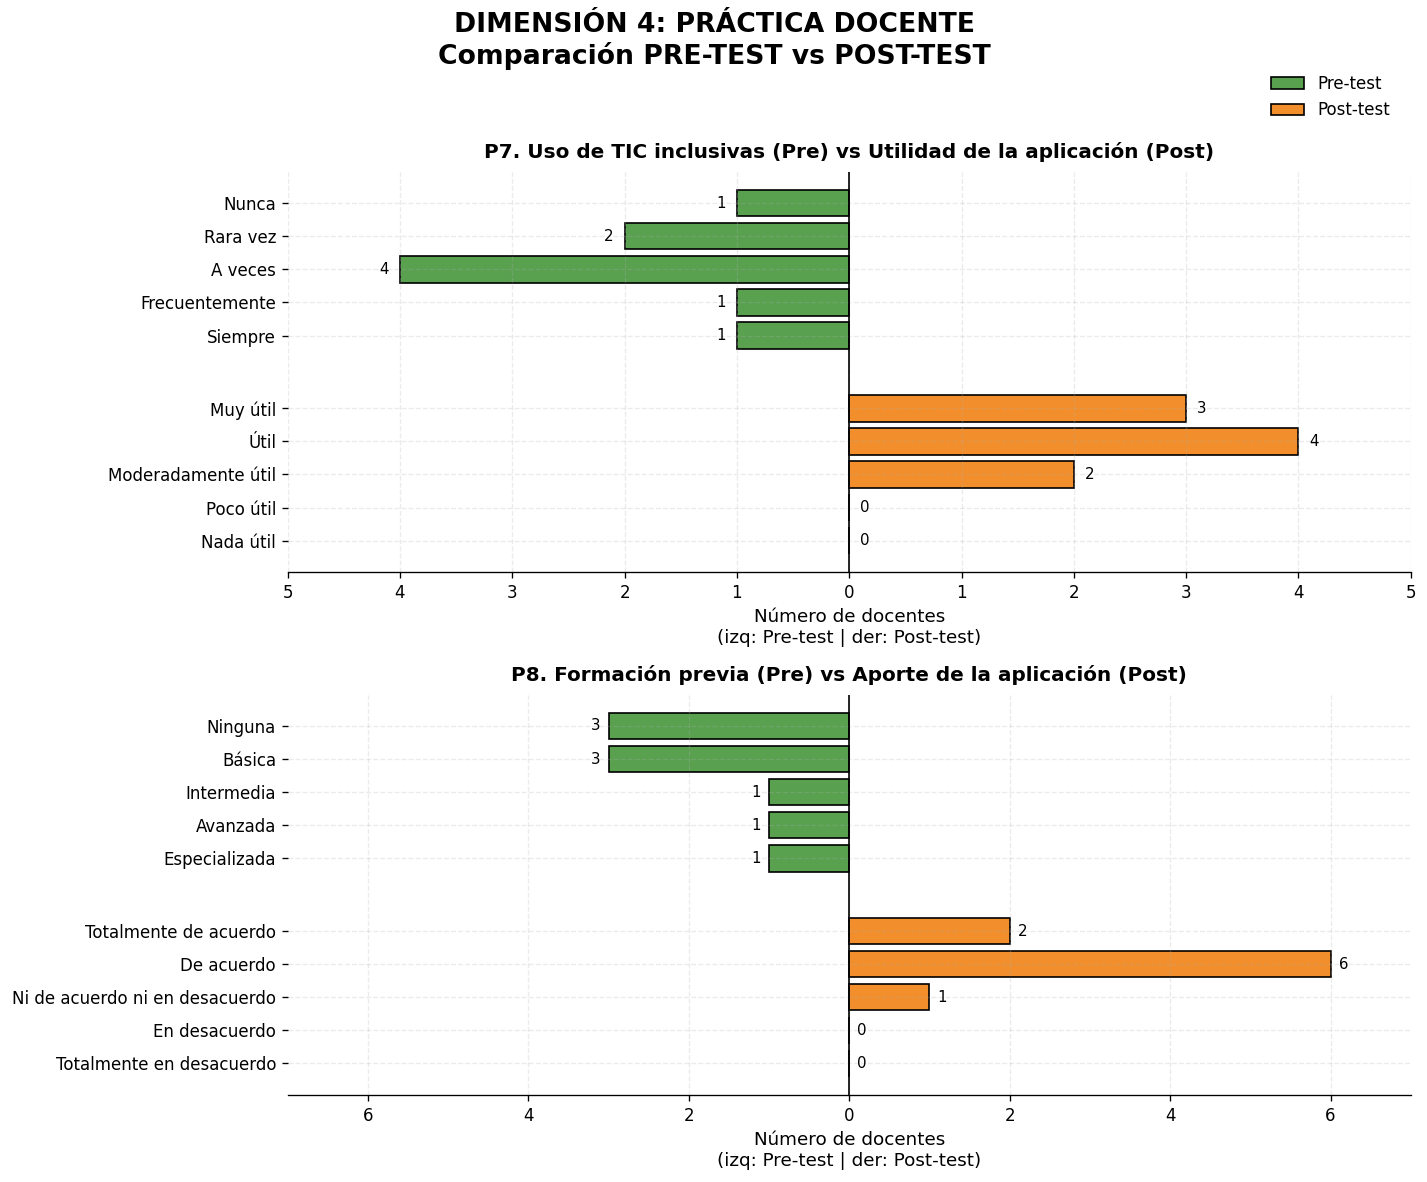

In [7]:
# =========================================================
# DIMENSIÓN 4 – PRÁCTICA DOCENTE
# =========================================================
COLOR_PRE  = "#59A14F"
COLOR_POST = "#F28E2B"

def grafica_bloques_pre_post(ax, pre_alt, pre_vals, post_alt, post_vals, titulo_pregunta):
    n_pre = len(pre_alt)
    n_post = len(post_alt)
    gap = 1.2

    y_pre = np.arange(n_pre)
    y_post = np.arange(n_post) + (n_pre + gap)

    # Barras espejo
    ax.barh(y_pre, -pre_vals, color=COLOR_PRE, edgecolor="black", label="Pre-test")
    ax.barh(y_post, post_vals, color=COLOR_POST, edgecolor="black", label="Post-test")

    # Línea central
    ax.axvline(0, color="black", linewidth=1)

    # Eje Y (incluye alternativas Pre y Post)
    yticks = list(y_pre) + list(y_post)
    ylabels = pre_alt + post_alt
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)
    ax.invert_yaxis()

    # Eje X con valores absolutos (enteros)
    max_val = max(pre_vals.max(), post_vals.max())
    ax.set_xlim(-(max_val + 1), (max_val + 1))

    ticks = np.arange(-(max_val + 1), max_val + 2, 1)
    ax.set_xticks(ticks)
    ax.set_xticklabels([str(abs(int(t))) for t in ticks])
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Etiquetas numéricas
    for i, v in enumerate(pre_vals):
        ax.text(-v - 0.1, y_pre[i], str(v), va="center", ha="right", fontsize=9)
    for i, v in enumerate(post_vals):
        ax.text(v + 0.1, y_post[i], str(v), va="center", ha="left", fontsize=9)

    # Subtítulo (negrita)
    ax.set_title(titulo_pregunta, fontsize=12, fontweight="bold", pad=8)

    # Estética
    ax.grid(axis="x", linestyle="--", alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    ax.set_xlabel("Número de docentes\n(izq: Pre-test | der: Post-test)")


# =========================================================
# P7 (PRE vs POST)
# =========================================================
# Pre-test P7: uso actual de TIC inclusivas
p7_pre_alt  = ["Nunca", "Rara vez", "A veces", "Frecuentemente", "Siempre"]
p7_pre_vals = np.array([1, 2, 4, 1, 1])

# Post-test P7: utilidad de la app
p7_post_alt  = ["Muy útil", "Útil", "Moderadamente útil", "Poco útil", "Nada útil"]
p7_post_vals = np.array([3, 4, 2, 0, 0])


# =========================================================
# P8 (PRE vs POST)
# =========================================================
# Pre-test P8: formación previa (nivel)
p8_pre_alt  = ["Ninguna", "Básica", "Intermedia", "Avanzada", "Especializada"]
p8_pre_vals = np.array([3, 3, 1, 1, 1])

# Post-test P8: Likert (aporte de la app)
p8_post_alt  = [
    "Totalmente de acuerdo",
    "De acuerdo",
    "Ni de acuerdo ni en desacuerdo",
    "En desacuerdo",
    "Totalmente en desacuerdo"
]
p8_post_vals = np.array([2, 6, 1, 0, 0])


# =========================================================
# FIGURA FINAL (P7 + P8)
# =========================================================
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

fig.suptitle(
    "DIMENSIÓN 4: PRÁCTICA DOCENTE\nComparación PRE-TEST vs POST-TEST",
    fontsize=16,
    fontweight="bold",
    y=0.98
)

grafica_bloques_pre_post(
    axes[0],
    p7_pre_alt, p7_pre_vals,
    p7_post_alt, p7_post_vals,
    "P7. Uso de TIC inclusivas (Pre) vs Utilidad de la aplicación (Post)"
)

grafica_bloques_pre_post(
    axes[1],
    p8_pre_alt, p8_pre_vals,
    p8_post_alt, p8_post_vals,
    "P8. Formación previa (Pre) vs Aporte de la aplicación (Post)"
)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(0.98, 0.94), frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])

# =========================================================
#  GUARDAR + DESCARGAR
# =========================================================
archivo = "Dimension4_P7_P8_PreVsPost.png"
fig.savefig(archivo, dpi=300, bbox_inches="tight")

try:
    from google.colab import files
    files.download(archivo)
except Exception:
    print(f" Gráfica guardada como: {archivo} (descarga automática solo en Google Colab)")

plt.show()


***DIMENSIÓN 5: VALORACIÓN DE LA APLICACIÓN MÓVIL***

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

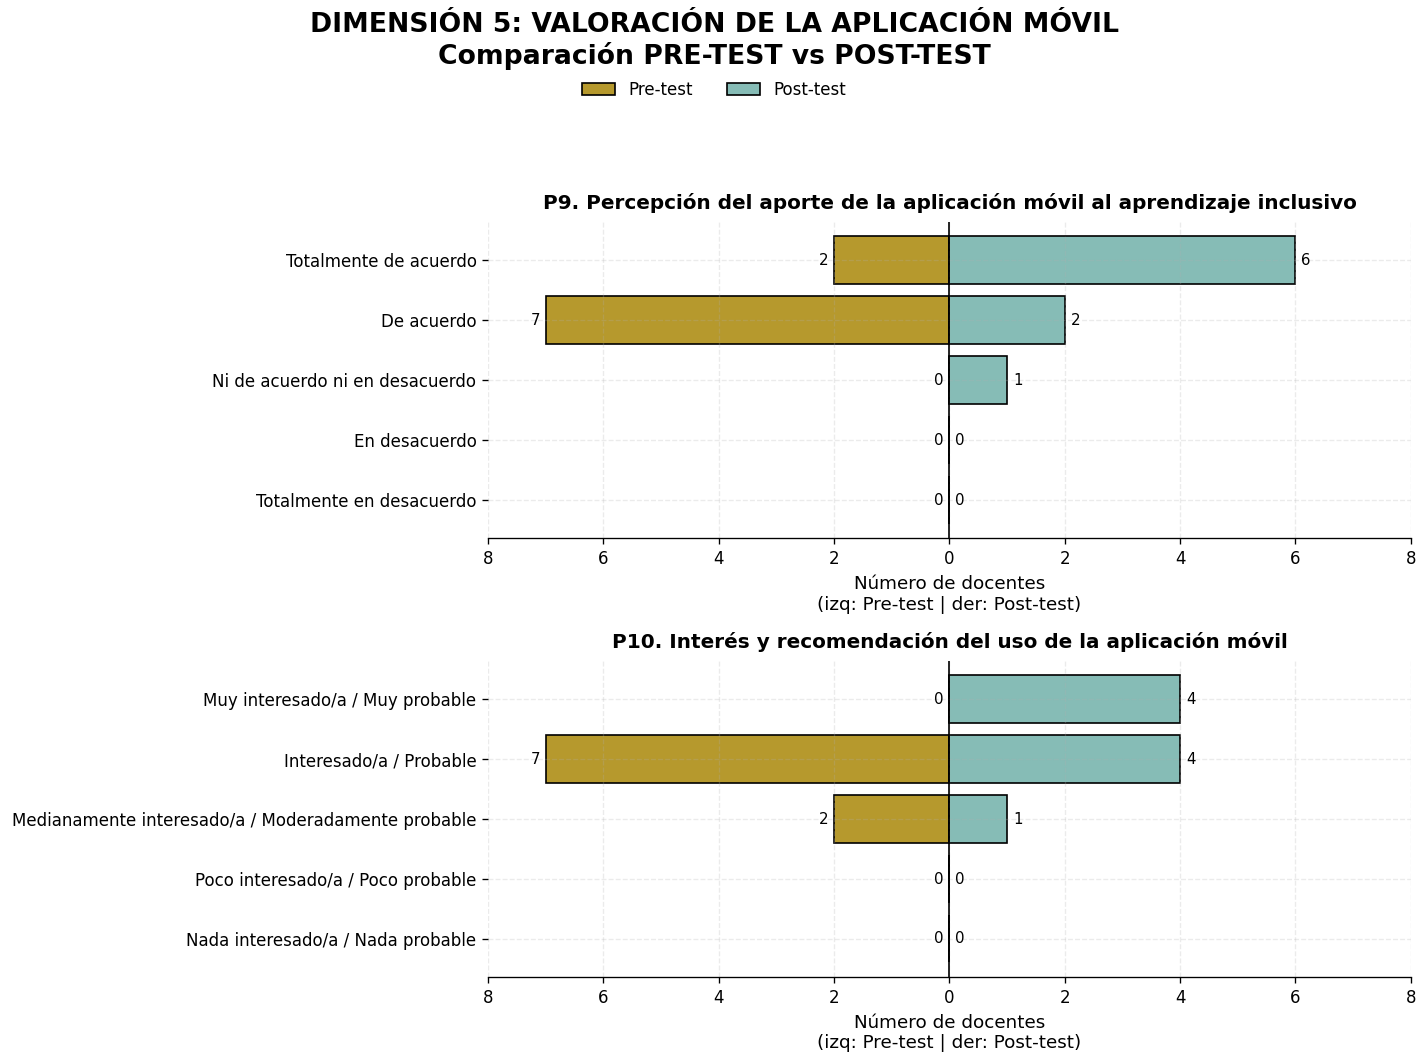

In [8]:
# =========================================================
# DIMENSIÓN 5 – VALORACIÓN DE LA APLICACIÓN MÓVIL
# =========================================================
COLOR_PRE  = "#B6992D"
COLOR_POST = "#86BCB6"

def grafica_espejo(ax, alternativas, pre_vals, post_vals, titulo_pregunta):
    y = np.arange(len(alternativas))

    ax.barh(y, -pre_vals, color=COLOR_PRE, edgecolor="black", label="Pre-test")
    ax.barh(y,  post_vals, color=COLOR_POST, edgecolor="black", label="Post-test")

    ax.axvline(0, color="black", linewidth=1)

    ax.set_yticks(y)
    ax.set_yticklabels(alternativas)
    ax.invert_yaxis()

    max_val = max(pre_vals.max(), post_vals.max())
    ax.set_xlim(-(max_val + 1), (max_val + 1))

    ticks = np.arange(-(max_val + 1), max_val + 2, 1)
    ax.set_xticks(ticks)
    ax.set_xticklabels([str(abs(int(t))) for t in ticks])
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    for i, v in enumerate(pre_vals):
        ax.text(-v - 0.1, i, str(v), va="center", ha="right", fontsize=9)
    for i, v in enumerate(post_vals):
        ax.text(v + 0.1, i, str(v), va="center", ha="left", fontsize=9)

    ax.set_title(titulo_pregunta, fontsize=12, fontweight="bold", pad=8)

    ax.grid(axis="x", linestyle="--", alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    ax.set_xlabel("Número de docentes\n(izq: Pre-test | der: Post-test)")


# =========================================================
# DATOS
# =========================================================

# P9 – Likert
p9_alt = [
    "Totalmente de acuerdo",
    "De acuerdo",
    "Ni de acuerdo ni en desacuerdo",
    "En desacuerdo",
    "Totalmente en desacuerdo"
]
p9_pre  = np.array([2, 7, 0, 0, 0])
p9_post = np.array([6, 2, 1, 0, 0])

# P10 – Interés / Recomendación (etiqueta combinada PRE/POST)
p10_alt = [
    "Muy interesado/a / Muy probable",
    "Interesado/a / Probable",
    "Medianamente interesado/a / Moderadamente probable",
    "Poco interesado/a / Poco probable",
    "Nada interesado/a / Nada probable"
]
p10_pre  = np.array([0, 7, 2, 0, 0])
p10_post = np.array([4, 4, 1, 0, 0])


# =========================================================
# FIGURA FINAL
# =========================================================
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

fig.suptitle(
    "DIMENSIÓN 5: VALORACIÓN DE LA APLICACIÓN MÓVIL\n"
    "Comparación PRE-TEST vs POST-TEST",
    fontsize=16,
    fontweight="bold",
    x=0.5,
    y=0.98
)

grafica_espejo(
    axes[0],
    p9_alt, p9_pre, p9_post,
    "P9. Percepción del aporte de la aplicación móvil al aprendizaje inclusivo"
)

grafica_espejo(
    axes[1],
    p10_alt, p10_pre, p10_post,
    "P10. Interés y recomendación del uso de la aplicación móvil"
)

# Leyenda centrada arriba
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.93), ncol=2, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.90])

# =========================================================
# GUARDAR + DESCARGAR
# =========================================================
archivo = "Dimension5_P9_P10_PreVsPost.png"
fig.savefig(archivo, dpi=300, bbox_inches="tight")

try:
    from google.colab import files
    files.download(archivo)
except Exception:
    print(f" Gráfica guardada como: {archivo} (descarga automática solo en Google Colab)")

plt.show()
